<a href="https://colab.research.google.com/github/Miguelhsa/Machine-Learning-Projects/blob/main/Proyecto_Clasificaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
# ========================================
# 📦 MANEJO DE DATOS Y ENTORNO
# ========================================
import os                            # Gestión de rutas y archivos del sistema
import numpy as np                   # Operaciones numéricas
import pandas as pd                  # Manipulación de datos tabulares
import kagglehub                     # Descarga directa de datasets desde Kaggle

# ========================================
# 📊 VISUALIZACIÓN
# ========================================
import matplotlib.pyplot as plt      # Visualización básica
import seaborn as sns                # Visualización avanzada
import plotly.express as px          # Visualizaciones interactivas
import missingno as msno             # Visualización de valores nulos
# import sweetviz                    # Informes EDA automáticos (opcional)
# import pandas_profiling           # Informes detallados EDA (opcional)

# ========================================
# ⚙️ CONFIGURACIÓN
# ========================================
from sklearn import set_config
set_config(transform_output="pandas")  # Hace que los transformers devuelvan DataFrames

import warnings
warnings.filterwarnings('ignore')     # Evita mensajes molestos al ejecutar

# ========================================
# ⚙️ PREPROCESAMIENTO Y TRANSFORMACIONES
# ========================================
from sklearn.preprocessing import (
    StandardScaler,
    OneHotEncoder,
    FunctionTransformer,
    OrdinalEncoder,
    LabelEncoder,
    MinMaxScaler,
    RobustScaler
)

from sklearn.impute import SimpleImputer     # Imputación de valores nulos
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector  # Preprocesamiento por columnas
from sklearn.pipeline import Pipeline         # Flujo de preprocesamiento + modelo
from sklearn import set_config
set_config(display='diagram')

# ========================================
# 🔀 DIVISIÓN DE DATOS Y VALIDACIÓN
# ========================================
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    GridSearchCV,
    StratifiedKFold
)

# ========================================
# 📈 MODELOS
# ========================================
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor

# ========================================
# 🔎 SIMILITUD Y CLUSTERING DE CATEGÓRICAS
# ========================================
#from sklearn.metrics.cluster import ClusterSimilarity

# ========================================
# 🔁 TRANSFORMACIÓN DE VARIABLE OBJETIVO (y)
# ========================================

from sklearn.compose import TransformedTargetRegressor  # Aplica una transformación a y (ej. log) durante el entrenamiento y la revierte al predecir

# ========================================
# 📏 MÉTRICAS DE EVALUACIÓN
# ========================================
from sklearn.metrics import (
    accuracy_score,
    r2_score,
    mean_absolute_error,
    mean_squared_error,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_auc_score
)

# ========================================
# 🔍 INTERPRETABILIDAD DE MODELOS
# ========================================
import shap      # Interpretabilidad (feature importance local/global)
#!pip install -U eli5. --> En caso de no funcionar eli5
#import eli5      # Explicaciones de modelos
import graphviz
from sklearn.tree import export_graphviz

# ========================================
# 💾 GUARDAR Y CARGAR MODELOS
# ========================================
import joblib    # Serialización rápida y ligera
import pickle    # Serialización más flexible de objetos Python

In [28]:
# Importa el módulo para trabajar con archivos .tar.gz o .tgz
import tarfile

# Importa herramientas para descargar archivos desde una URL
import urllib.request

# Importa Path para trabajar con rutas de forma moderna y segura
from pathlib import Path

# Importa pandas para trabajar con DataFrames
import pandas as pd

def load_housing_data():
    # Define la ruta donde se espera encontrar el archivo descargado
    tarball_path = Path("datasets/housing.tgz")

    # Verifica si el archivo ya está descargado
    if not tarball_path.is_file():
        # Crea la carpeta "datasets" si no existe
        Path("datasets").mkdir(parents=True, exist_ok=True)

        # URL desde donde se va a descargar el archivo
        url = "https://github.com/ageron/data/raw/main/housing.tgz"

        # Descarga el archivo .tgz desde GitHub y lo guarda localmente
        urllib.request.urlretrieve(url, tarball_path)

    # Abre el archivo .tgz como un archivo comprimido tipo tar
    with tarfile.open(tarball_path) as housing_tarball:
        # Extrae todos los archivos contenidos en el .tgz dentro del directorio "datasets"
        housing_tarball.extractall(path="datasets")

    # Lee el archivo CSV extraído como un DataFrame de pandas y lo retorna
    return pd.read_csv(Path("datasets/housing/housing.csv"))

df = load_housing_data()
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


✅ Dimensiones: (20640, 10)

🧠 Tipos de datos:
longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

🧼 Valores nulos por columna:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

📈 Estadísticas generales:
                      count           mean            std         min  \
longitude           20640.0    -119.569704       2.003532   -124.3500   
latitude            20640.0      35.631861       2.135952     32.5400   
housing_median_age  20640.0      28.639486      12.585558      1.0000   
total_rooms       

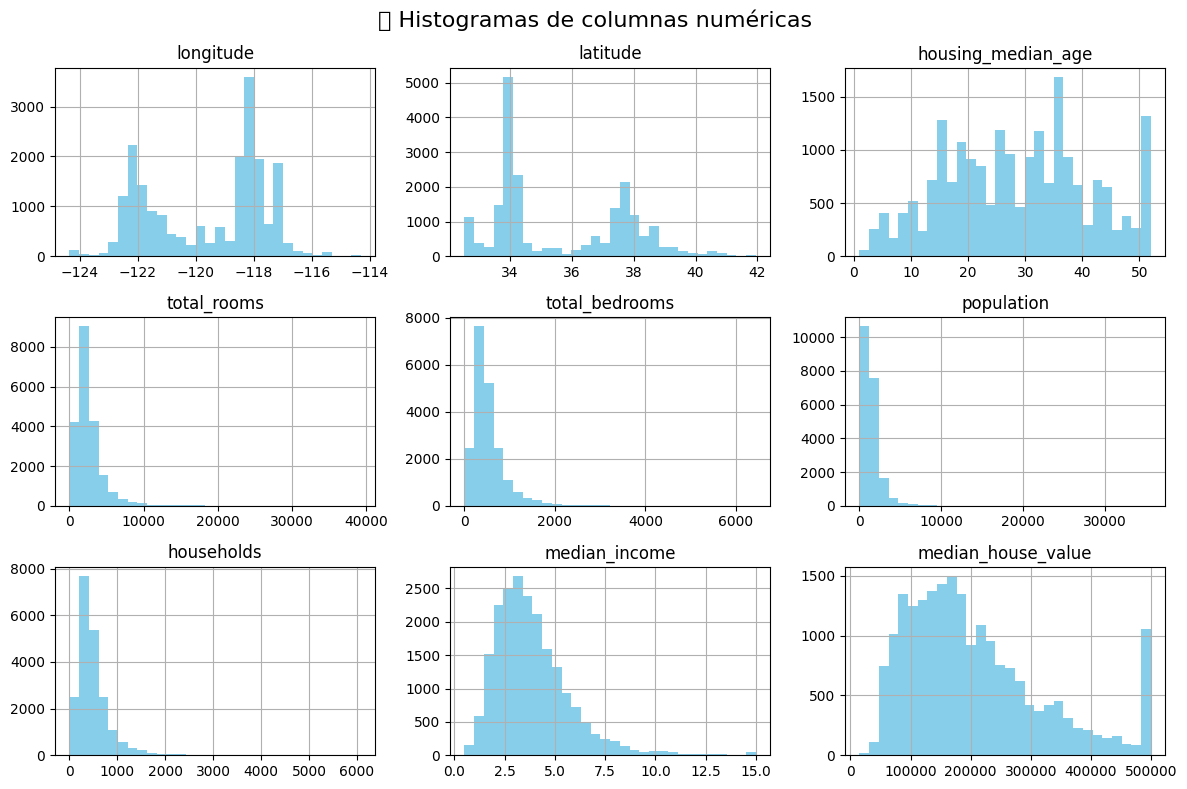

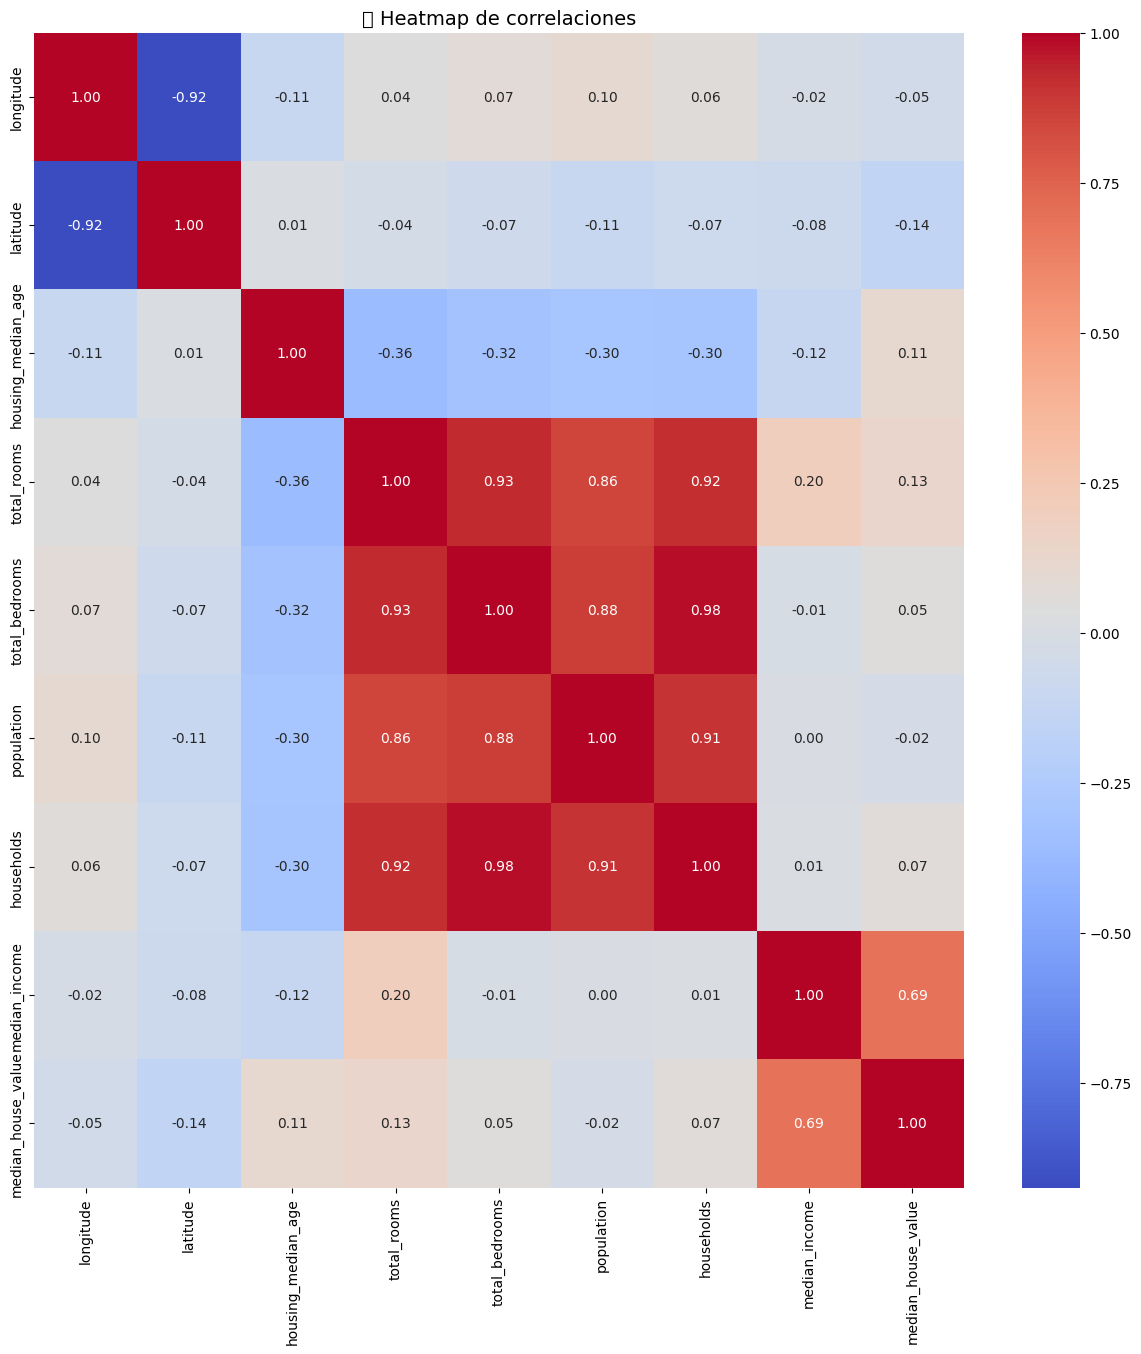

In [29]:
print("✅ Dimensiones:", df.shape)
print("\n🧠 Tipos de datos:")
print(df.dtypes)

print("\n🧼 Valores nulos por columna:")
print(df.isnull().sum())

print("\n📈 Estadísticas generales:")
print(df.describe().T)

# --------------------------
# 📊 Value Counts (solo categóricas)
# --------------------------
print("\n🔎 Distribución de variables categóricas:")
for col in df.select_dtypes(include=['object', 'category']).columns:
    print(f"\n🔹 {col}")
    print(df[col].value_counts())

# --------------------------
# 📊 Histogramas de numéricas
# --------------------------
df.select_dtypes(include=np.number).hist(figsize=(12, 8), bins=30, grid=True, color='skyblue')
plt.suptitle("📊 Histogramas de columnas numéricas", fontsize=16)
plt.tight_layout()
plt.show()

# --------------------------
# 🔗 Matriz de correlación
# --------------------------
num_cols = df.select_dtypes(include=np.number)
corr = num_cols.corr()

plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("🔗 Heatmap de correlaciones", fontsize=14)
plt.show()

In [30]:
df_ocean = df[["ocean_proximity", "median_house_value","total_rooms"]]
df_near_ocean = df_ocean[df_ocean["ocean_proximity"] == "NEAR BAY"]
df_near_ocean[["median_house_value","total_rooms"]].mean()

,0
median_house_value,259212.31179
total_rooms,2493.58952


In [31]:
df_nulos_rooms = df[df["total_bedrooms"].isna()]
df_nulos_rooms

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
182,-118.27,34.04,13.0,1784.0,NaN,2158.0,682.0,1.7038,118100.0,<1H OCEAN
327,-117.65,34.04,15.0,3393.0,NaN,2039.0,611.0,3.9336,151000.0,INLAND
366,-122.50,37.75,44.0,1819.0,NaN,1137.0,354.0,3.4919,271800.0,NEAR OCEAN
477,-117.99,34.14,30.0,2346.0,NaN,1988.0,474.0,2.5625,153000.0,INLAND
495,-114.59,34.83,41.0,812.0,NaN,375.0,158.0,1.7083,48500.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
19880,-118.23,33.94,36.0,1110.0,NaN,1417.0,302.0,2.3333,92100.0,<1H OCEAN
19952,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20088,-119.73,36.83,8.0,3602.0,NaN,1959.0,580.0,5.3478,138800.0,INLAND
20325,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN


<Axes: xlabel='longitude', ylabel='latitude'>

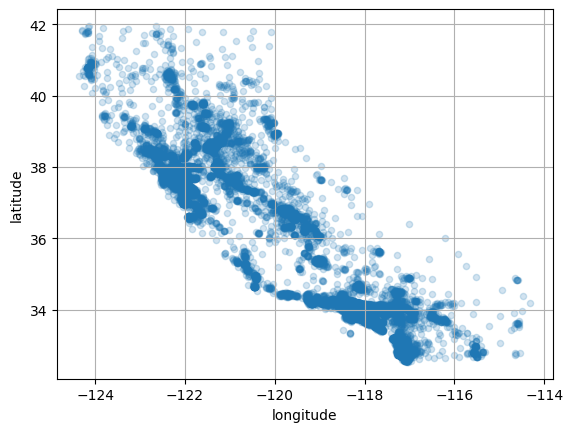

In [32]:
df.plot(
    kind = "scatter",
    x = "longitude",
    y = "latitude",
    grid = True,
    alpha = 0.2
)

# trabajo de nulos

In [33]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [34]:
df["total_bedrooms"].fillna(df['total_bedrooms'].mean(),inplace=True)

#Feature engineering

##cuartos por casa

In [35]:
df["cuartos_por_casa"] = df["total_rooms"]/df["households"]
df['cuartos_por_casa'].describe().T

,cuartos_por_casa
count,20640.000000
mean,5.429000
std,2.474173
min,0.846154
25%,4.440716
50%,5.229129
75%,6.052381
max,141.909091


## %dormitorios

In [36]:
df["%dormitorios"] = (df["total_bedrooms"]/df["total_rooms"])*100
df['%dormitorios'].describe().T

,%dormitorios
count,20640.000000
mean,21.447798
std,6.976426
min,4.593651
25%,17.536436
50%,20.331363
75%,24.025532
max,349.266593


##personas por casa

In [37]:
df["people_per_house"] = df["population"]/df["households"]

##Estudio nuevo de las variables

✅ Dimensiones: (20640, 13)

🧠 Tipos de datos:
longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
cuartos_por_casa      float64
%dormitorios          float64
people_per_house      float64
dtype: object

🧼 Valores nulos por columna:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
cuartos_por_casa      0
%dormitorios          0
people_per_house      0
dtype: int64

📈 Estadísticas generales:
                      count           mean            std           min  \
longitude           20640.0    -119.569704       2.003532   -124.350000   
latitude          

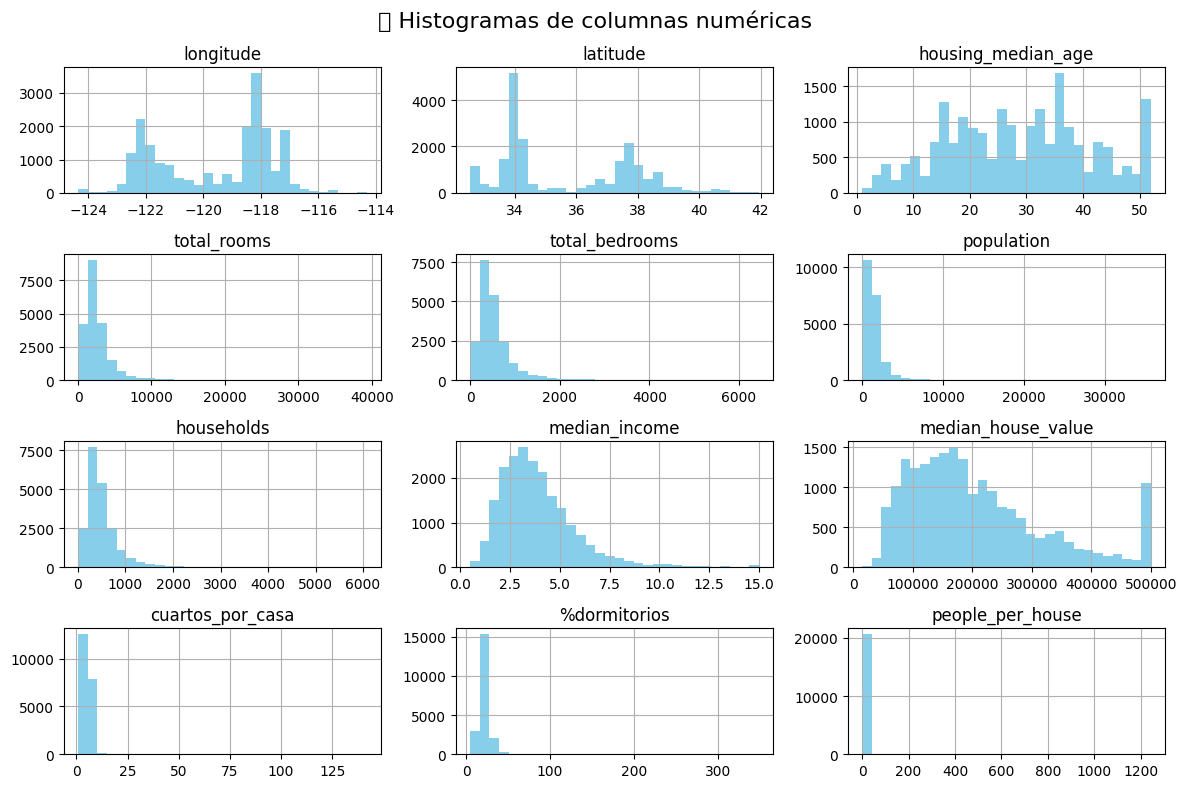

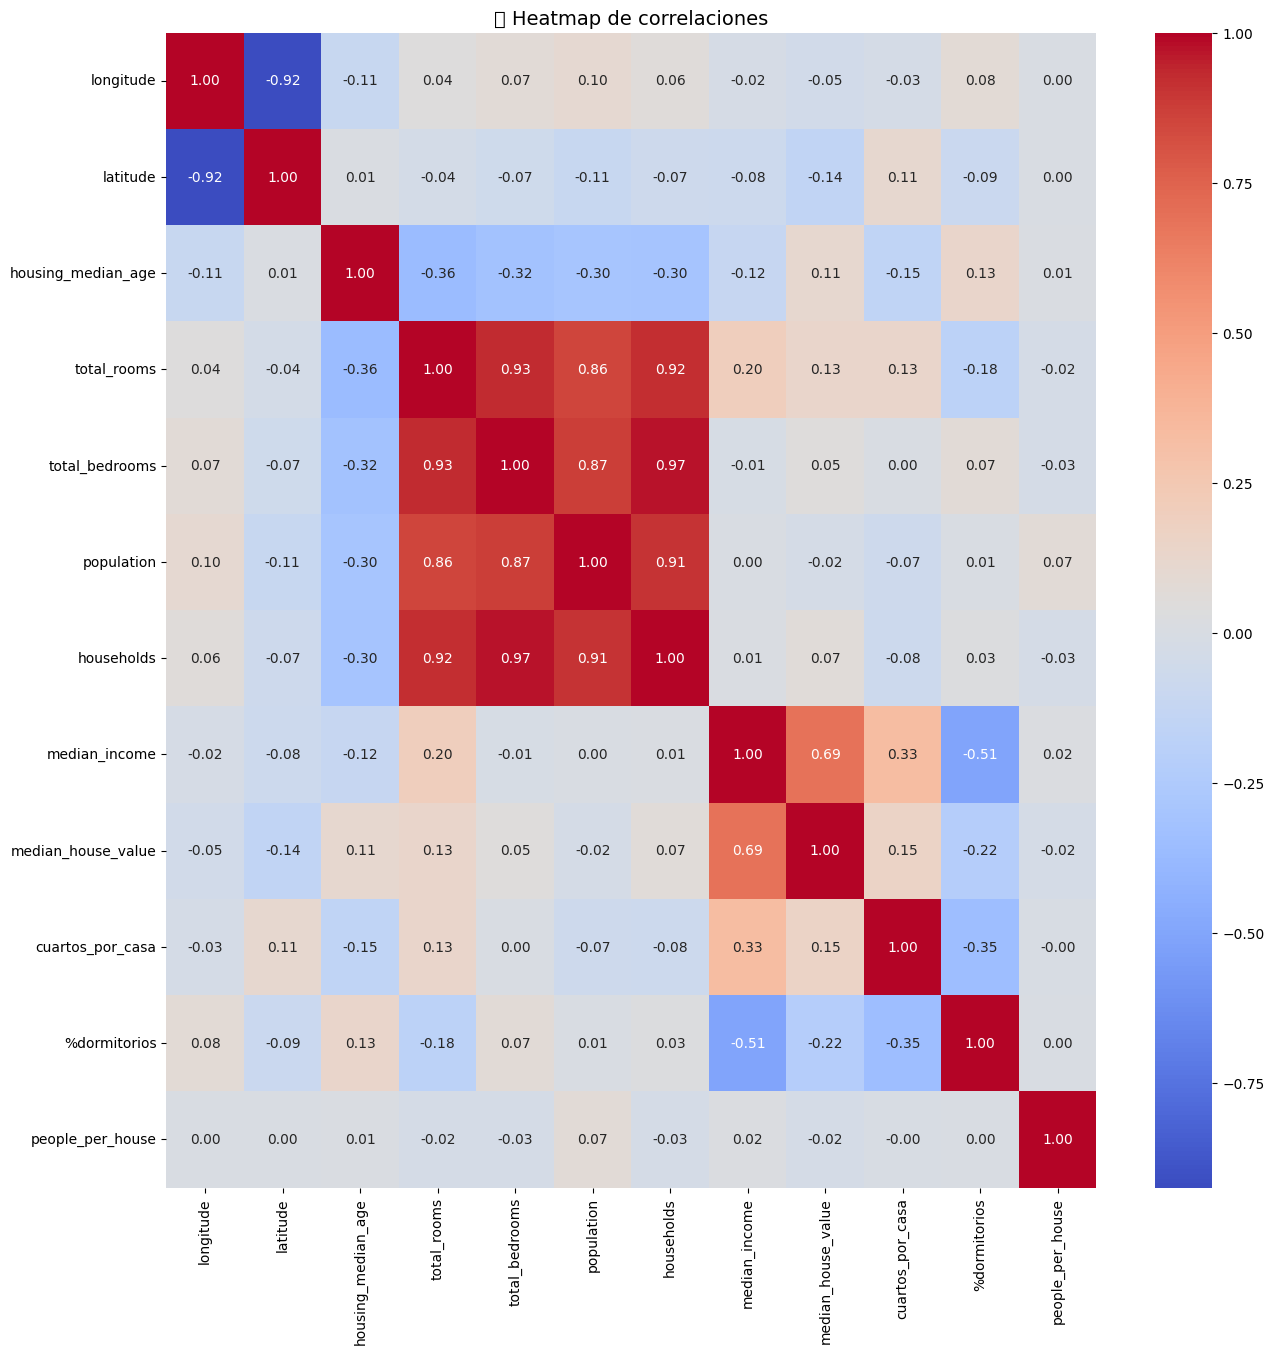

In [38]:
print("✅ Dimensiones:", df.shape)
print("\n🧠 Tipos de datos:")
print(df.dtypes)

print("\n🧼 Valores nulos por columna:")
print(df.isnull().sum())

print("\n📈 Estadísticas generales:")
print(df.describe().T)

# --------------------------
# 📊 Value Counts (solo categóricas)
# --------------------------
print("\n🔎 Distribución de variables categóricas:")
for col in df.select_dtypes(include=['object', 'category']).columns:
    print(f"\n🔹 {col}")
    print(df[col].value_counts())

# --------------------------
# 📊 Histogramas de numéricas
# --------------------------
df.select_dtypes(include=np.number).hist(figsize=(12, 8), bins=30, grid=True, color='skyblue')
plt.suptitle("📊 Histogramas de columnas numéricas", fontsize=16)
plt.tight_layout()
plt.show()

# --------------------------
# 🔗 Matriz de correlación
# --------------------------
num_cols = df.select_dtypes(include=np.number)
corr = num_cols.corr()

plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("🔗 Heatmap de correlaciones", fontsize=14)
plt.show()

#Escalado y normalización

In [39]:
#quiero meter el preprocesamiento en el pipe
# pipe line numericas

In [40]:
target = "median_house_value"
X = df.drop("median_house_value",axis = 1)
y = df[target]

housing_median_age
✅
Rango pequeño (0–50), pero podría escalarse para mantener coherencia con otras.
total_rooms
✅
Rango muy amplio (hasta ~40,000), escalar para evitar dominar el modelo.
total_bedrooms
✅
Rango amplio, escalado recomendado.
population
✅
Rango muy grande, escalar es imprescindible.
households
✅
Similar a población.
median_income
✅
Aunque está centrado en torno a 3–5, su escala puede afectar modelos sensibles. Mejor escalar.
median_house_value

cuartos_por_casa
✅
Puede tener outliers. Mejor normalizar.
%dormitorios
✅
Parece contener valores extremos o errores. Escalar y revisar outliers.


In [41]:
num_cols = df.select_dtypes(include = "number").columns.tolist()
num_cols = [col for col in num_cols if col not in ["longitude" , "latitude"]]
num_cat = df.select_dtypes(include = "object").columns.tolist()


In [42]:
num_cols

['housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'cuartos_por_casa',
 '%dormitorios',
 'people_per_house']

### 🔧 Escalado recomendado por variable

- **longitude**: ❌ No escalar (coordenada geográfica; considerar ingeniería de características si se usa)
- **latitude**: ❌ No escalar (ídem anterior)

- **housing_median_age**: `MinMaxScaler`  
  Rango limitado y distribución relativamente uniforme. Escalado a [0, 1] facilita su uso.

- **total_rooms**: `Log + StandardScaler`  
  Rango muy amplio y distribución sesgada a la derecha. Aplicar log primero para reducir asimetría.

- **total_bedrooms**: `Log + StandardScaler`  
  Similar a `total_rooms`. Requiere la misma transformación.

- **population**: `Log + StandardScaler`  
  Valores extremos y sesgo derecho. Log para normalizar antes de escalar.

- **households**: `Log + StandardScaler`  
  Se comporta como `population`. Transformación combinada recomendada.

- **median_income**: `StandardScaler`  
  Distribución centrada y más parecida a una normal. Z-score es ideal.

- **cuartos_por_casa**: `RobustScaler`  
  Tiene outliers. Escalado robusto con mediana e IQR es adecuado.

- **%dormitorios**: `RobustScaler`  
  Posibles valores atípicos o errores. RobustScaler mitiga su impacto.

Separación de los conjuntos de Training y test

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [44]:
X_train.shape[0] + X_test.shape[0] == X.shape[0]

True

#Separo cada una de las variables para montar los pipe de transformación

In [45]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'cuartos_por_casa',
       '%dormitorios', 'people_per_house'],
      dtype='object')

In [47]:
MinMAx = ["housing_median_age"]
log_standar = ["total_rooms","total_bedrooms", "population", "households"]
Stand_scal = ["median_income"]
Robust_scal = ["cuartos_por_casa","%dormitorios","people_per_house"]

## Monto el pipe para las transformaciones

In [47]:
# MinMax

MinMax_preprocessing = Pipeline(steps= [
    "scaler",MinMaxScaler()
])

#log_standar

Log_standar_preprocessing = Pipeline(steps =[
    ("log", FunctionTransformer(np.log1p, validate = False)),
    ("scaler",StandardScaler())
])

#Stand_scal
Stand_scal = Pipeline(steps=[
    "stand",StandardScaler()
])

#Robust_scaler
Robust_scal = Pipeline(steps=[
  ("imputer",SimpleImputer(strategy="median")),
  ("Rscaler",RobustScaler())
])